<a href="https://colab.research.google.com/github/Yojana-1808/titanic-dataset/blob/main/yojana_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/content/titanic dataset (kaggle).csv")
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Unnamed: 11,PassengerId.1,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,892.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,893.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,894.0,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,895.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,896.0,1.0


In [3]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)

print("\nInfo:")
df.info()

print("\nStatistical Summary:")
df.describe()

Shape of dataset: (418, 14)

Columns:
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Unnamed: 11', 'PassengerId.1',
       'Survived'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Name           418 non-null    object 
 3   Sex            418 non-null    object 
 4   Age            332 non-null    float64
 5   SibSp          418 non-null    int64  
 6   Parch          418 non-null    int64  
 7   Ticket         418 non-null    object 
 8   Fare           417 non-null    float64
 9   Cabin          91 non-null     object 
 10  Embarked       418 non-null    object 
 11  Unnamed: 11    0 non-null      float64
 12  PassengerId.1  345 non-null    float

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Unnamed: 11,PassengerId.1,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,0.0,345.000000,345.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,NaN,1064.000000,0.350725
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,NaN,99.737155,0.477890
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,NaN,892.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,NaN,978.000000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,NaN,1064.000000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,NaN,1150.000000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,NaN,1236.000000,1.000000


In [4]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [5]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
df.drop(columns=['Cabin'], inplace=True)

# Verify cleaning
df.isnull().sum()

/tmp/ipython-input-4203648774.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-4203648774.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


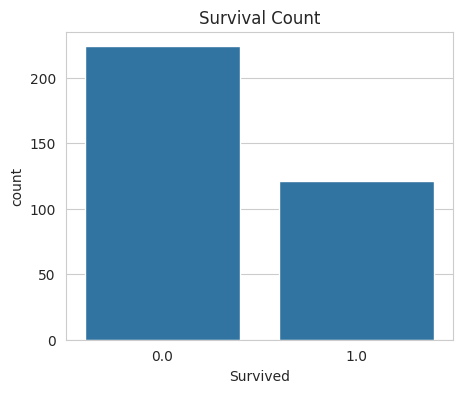

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


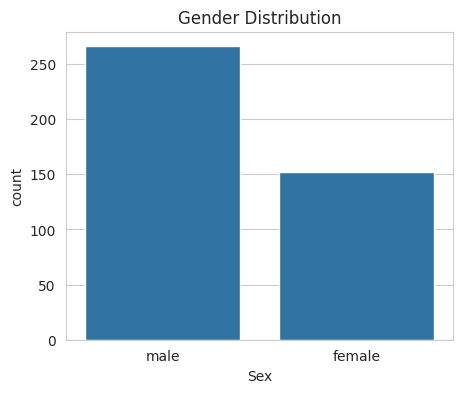

In [7]:
plt.figure(figsize=(5,4))
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution")
plt.show()


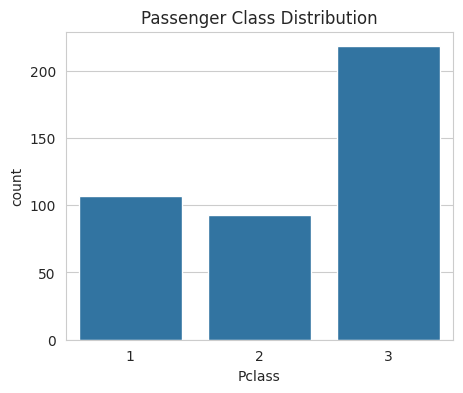

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x='Pclass', data=df)
plt.title("Passenger Class Distribution")
plt.show()


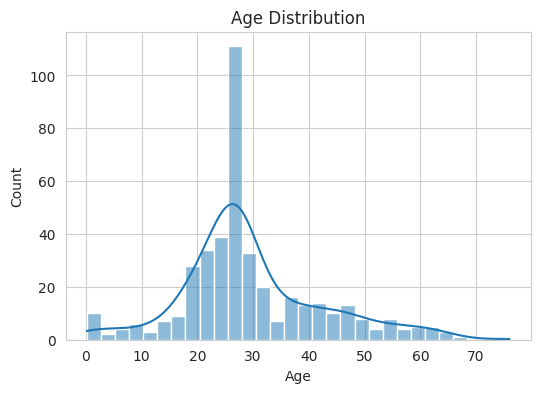

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


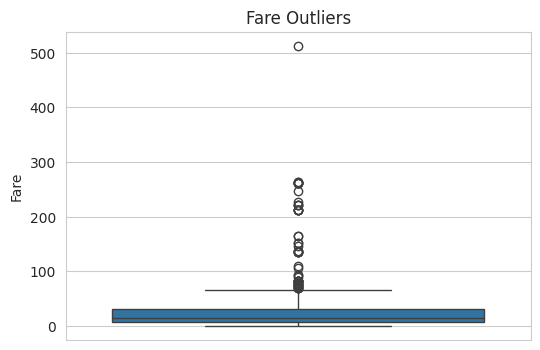

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Fare'])
plt.title("Fare Outliers")
plt.show()


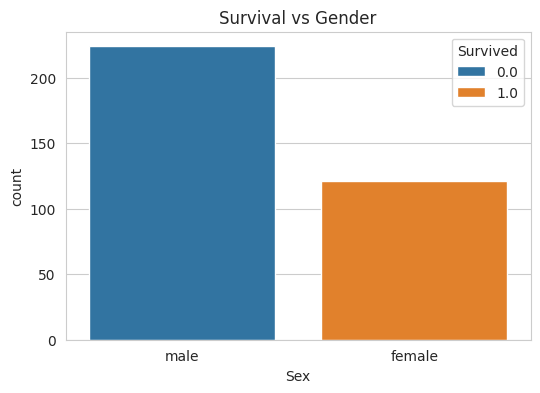

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival vs Gender")
plt.show()


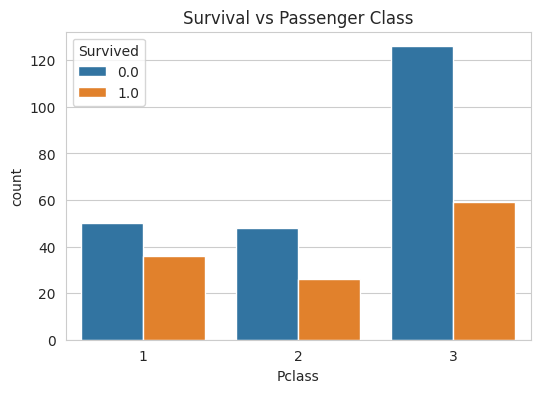

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival vs Passenger Class")
plt.show()


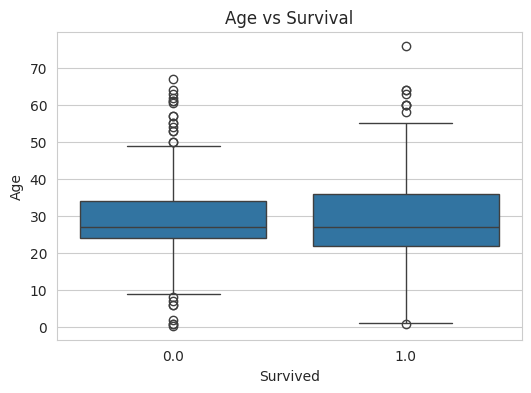

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()


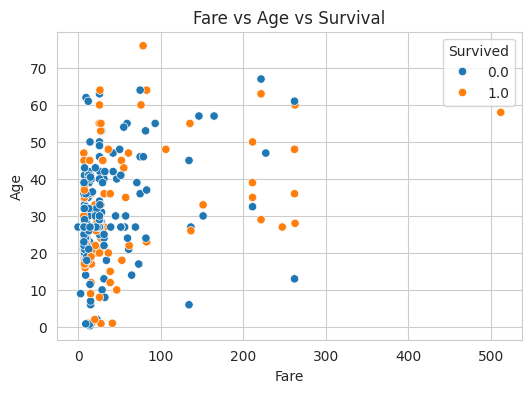

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=df)
plt.title("Fare vs Age vs Survival")
plt.show()


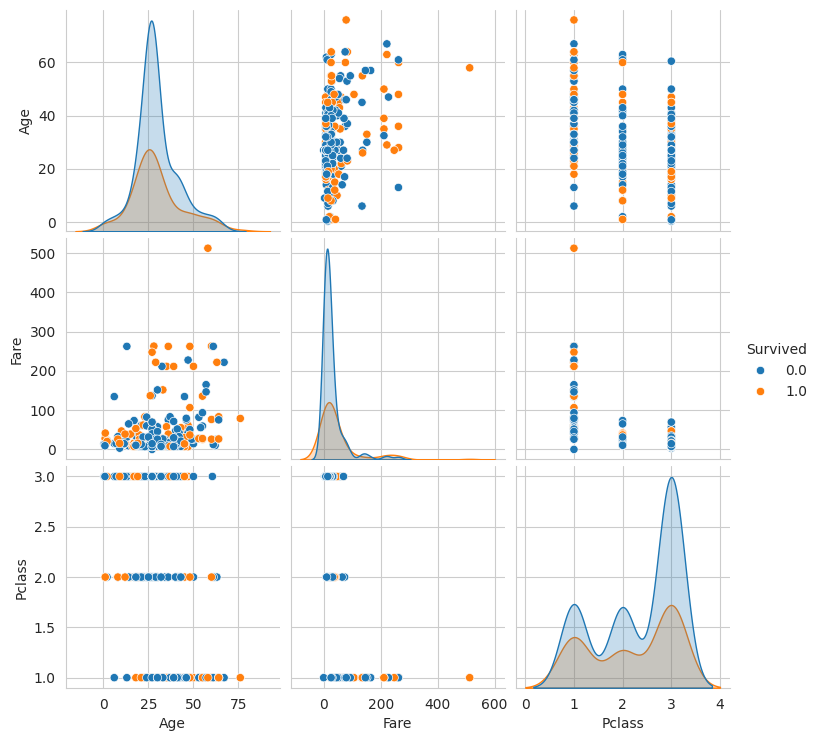

In [15]:
sns.pairplot(df[['Survived','Age','Fare','Pclass']], hue='Survived')
plt.show()


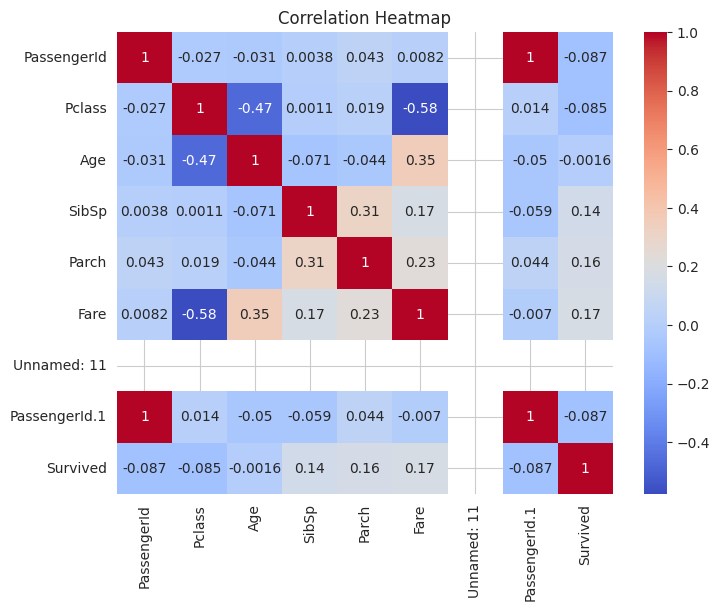

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [17]:
print("""
Key Findings:
- Females had higher survival rate than males
- 1st class passengers survived more
- Higher fare increased survival chances
- Children survival rate higher
- Males in 3rd class had highest deaths
""")



Key Findings:
- Females had higher survival rate than males
- 1st class passengers survived more
- Higher fare increased survival chances
- Children survival rate higher
- Males in 3rd class had highest deaths

